In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training) ",
                      4: "making predictions & evaluating a model (inference)",
                      5: "saving & loading a model",
                      6: "putting it all together" }

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training) ',
 4: 'making predictions & evaluating a model (inference)',
 5: 'saving & loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural networks.
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

## 1. Data (Preparing & Loading)

In ML, data can be almost anything eg:

* Excel spreadsheet
* Images of any kind
* Videos
* Audio

ML:

1. Get data into numerical representation
2. Build models to learn patterns in that numerical representation

Linear Regression Formula:

Making a straight line with known **parameters**

In [3]:
#Creating known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training & test sets (VERY IMPORTANT)

In [5]:
#Create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
      """
      Plots training data, test data & compares predictions.
      """
      plt.figure(figsize = (10, 7))

      # Plot training in blue
      plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

      # Plot test data in green

      plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

      # Are there predictions?
      if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

      plt.legend(prop = {"size" : 14});

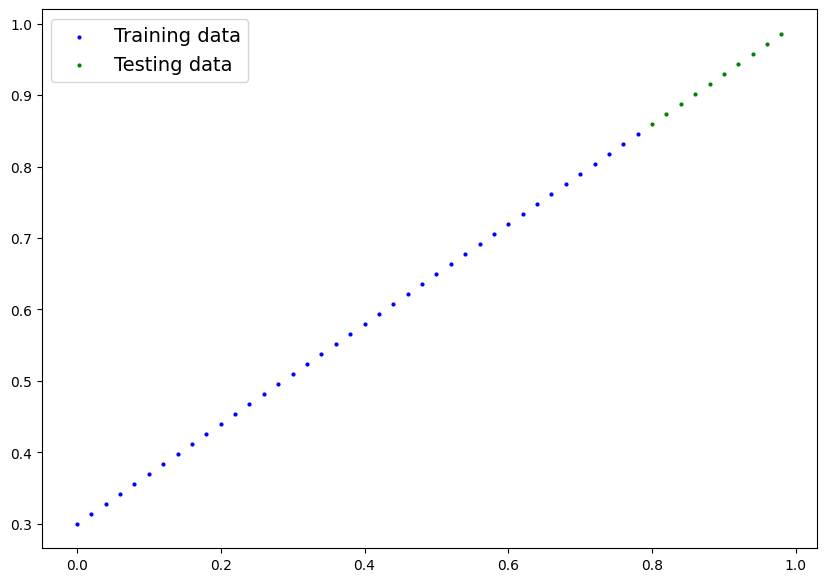

In [7]:
plot_predictions();

## Building a PyTorch model



In [8]:
# Create linear regression model class

from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # Forward method to show computation in model.

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### PyTorch model building essentials

* torch.nn - contains all building blocks for computational graphs (eg: neural networks )
* torch.nn.Parameter
* torch.nn.Module - Base class for all neural networks
* torch.optim - Location for PyTorch Live
* def forward() - All nn.module subclasses require you to overwrite forward().





In [9]:
# Random seed:
import torch
from torch import nn

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [10]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [11]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [12]:
weight, bias

(0.7, 0.3)

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# Checking our model's predictive power:

with torch.inference_mode():
  y_preds = model_0(X_test)




y_preds


tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

In [15]:
y_preds = model_0(X_test)
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]], grad_fn=<AddBackward0>)

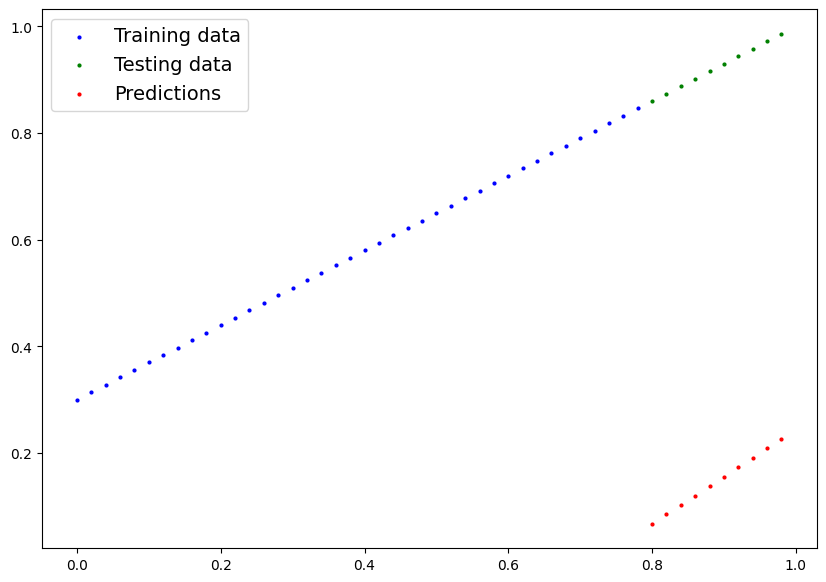

In [16]:
plot_predictions(predictions = y_preds.detach().cpu().numpy())

### Training model

Training model - allowing model to move from an unknown parameters (random) to known parameters.


In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [18]:
# Check model's parameters (a value that the model sets itself)

model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [19]:
# Setup loss function

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1) # lr = learning rate

In [20]:
with torch.no_grad():
  list(model_0.parameters())

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [22]:
torch.manual_seed(42)

epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  model_0.train()

  #1) Forward pass
  y_pred =  model_0(X_train)

  loss = loss_fn(y_pred, y_train)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step() # How the optimizer changes will accumate through the loop.


  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (droupout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking.
  # with torch.no_grad(): Slower way of torch.inference_mode()

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(f"Epoch {epoch}: Train loss = {loss:.4f}, Test loss = {test_loss:.4f}")







    print(model_0.state_dict())


Epoch: 0 | Loss: 0.8670692443847656 | Test loss: 0.6412245631217957
Epoch 0: Train loss = 0.8671, Test loss = 0.6412
OrderedDict([('weights', tensor([0.9213])), ('bias', tensor([-0.5382]))])
Epoch: 10 | Loss: 0.08487670868635178 | Test loss: 0.19306938350200653
Epoch 10: Train loss = 0.0849, Test loss = 0.1931
OrderedDict([('weights', tensor([1.1059])), ('bias', tensor([0.1318]))])
Epoch: 20 | Loss: 0.050566136837005615 | Test loss: 0.1103452667593956
Epoch 20: Train loss = 0.0506, Test loss = 0.1103
OrderedDict([('weights', tensor([0.9343])), ('bias', tensor([0.2018]))])
Epoch: 30 | Loss: 0.016618765890598297 | Test loss: 0.048851221799850464
Epoch 30: Train loss = 0.0166, Test loss = 0.0489
OrderedDict([('weights', tensor([0.7697])), ('bias', tensor([0.2868]))])
Epoch: 40 | Loss: 0.049438267946243286 | Test loss: 0.10285623371601105
Epoch 40: Train loss = 0.0494, Test loss = 0.1029
OrderedDict([('weights', tensor([0.7742])), ('bias', tensor([0.3368]))])
Epoch: 50 | Loss: 0.0494382679

In [23]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.86706924, 0.08487671, 0.05056614, 0.01661877, 0.04943827,
        0.04943827, 0.04943827, 0.04943827, 0.04943827, 0.04943827,
        0.04943827, 0.04943827, 0.04943827, 0.04943827, 0.04943827,
        0.04943827, 0.04943827, 0.04943827, 0.04943827, 0.04943827],
       dtype=float32),
 [tensor(0.6412),
  tensor(0.1931),
  tensor(0.1103),
  tensor(0.0489),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029),
  tensor(0.1029)])

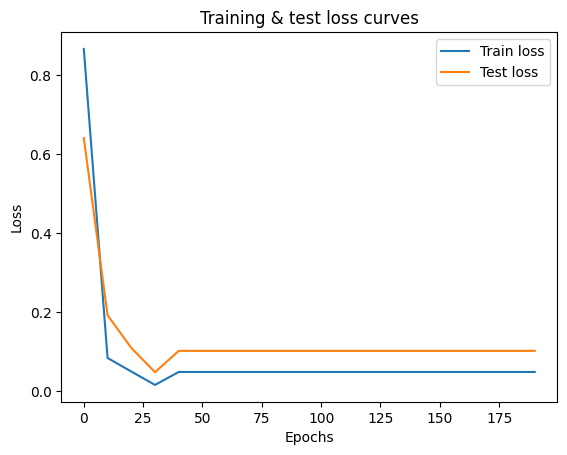

In [24]:
# Plot loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training & test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7352])), ('bias', tensor([0.2368]))])

In [27]:
weight, bias

(0.7, 0.3)

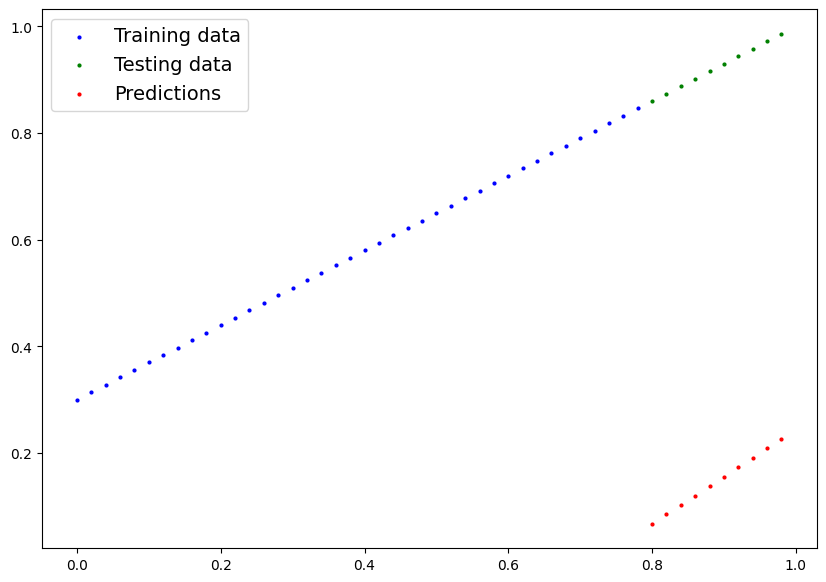

In [28]:
plot_predictions(predictions = y_preds.detach().cpu().numpy())

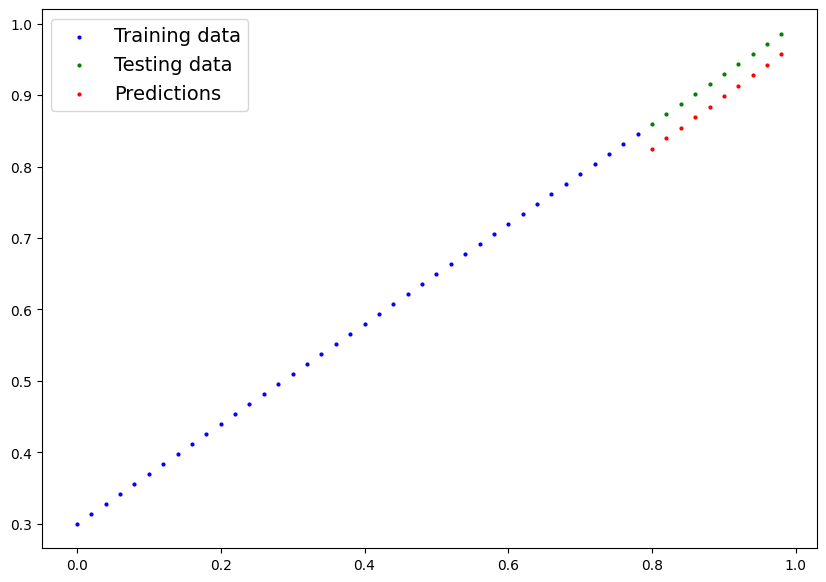

In [29]:
plot_predictions(predictions = y_preds_new)

## Saving a model

3 main methods:

torch.save() - Save PyTorch objects in pickle format.

torch.load() - Load a saved PyTorch object

torch.nn.Module.load_state_dict() - Load model's saved state dictionary


In [30]:
# Save PyTorch model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pth


In [31]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 24 23:27 01_pytorch_workflow_model_0.pth


In [32]:
## Loading PyTorch

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7352])), ('bias', tensor([0.2368]))])

In [34]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8250],
        [0.8397],
        [0.8544],
        [0.8691],
        [0.8838],
        [0.8985],
        [0.9132],
        [0.9279],
        [0.9426],
        [0.9573]])

In [35]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [36]:
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]], grad_fn=<AddBackward0>)

In [37]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8250],
        [0.8397],
        [0.8544],
        [0.8691],
        [0.8838],
        [0.8985],
        [0.9132],
        [0.9279],
        [0.9426],
        [0.9573]])

Putting it all together:

In [38]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version:

torch.__version__


'2.6.0+cu124'

Create Device-Agnostic Code

If there is access to a GPU, our code will use it for potentially faster computing.

If there isn't a GPU available, code will default to using CPU.


In [39]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [40]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# 6.1 Data

In [41]:
# Create data using linear regression formula y = weight * X + bias (y = mx + c)

weight = 0.7
bias = 0.3

# Create range values

start = 0
end = 1
step = 0.02

# Create X & y (features & labels)

X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, errors pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [42]:
# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

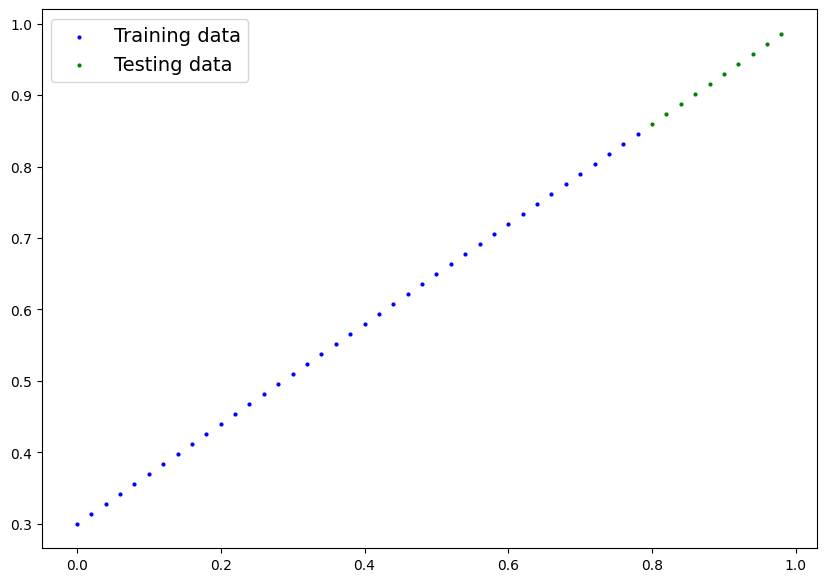

In [43]:
# Plot the data
# Note: If plot_predictions() function not loaded, error will occur.

plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch Linear Model

In [44]:
# Create linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

  # Set manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [45]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [46]:
# Check model current device
next(model_1.parameters()).device

device(type='cpu')

In [47]:
# Set model to use the target device

model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

###6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Test loop

In [48]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01, )


In [49]:
# Training loop:

torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range (epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [51]:
weight, bias

(0.7, 0.3)

### 6.4 Making & Evaluating Predictions

In [52]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

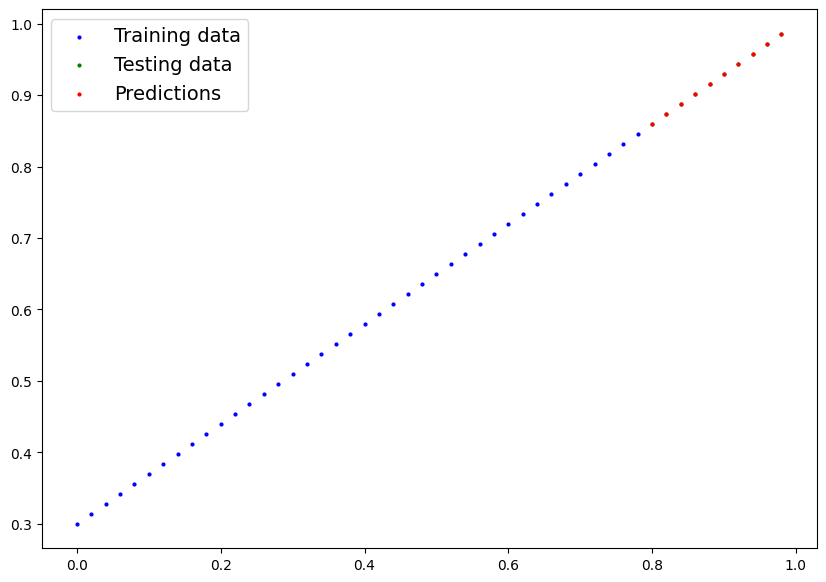

In [53]:
# Check out our model predictions visually
plot_predictions(predictions = y_preds.cpu())

### 6.5 Saving & loading a trained model

In [54]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_1.pth


In [55]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [56]:
# Load a PyTorch Model

# Create a new instance of Linear Regression Model V2
loaded_model_1 = LinearRegressionModelV2()

# Load saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [58]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [59]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises & Extra Curriculum

Pytorch Deep Learning repo https://www.learnpytorch.io/01_pytorch_workflow/